In [ ]:
from google.colab import drive, files
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import random
import shutil
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip '/content/drive/MyDrive/Deep Learning/CarDetection.zip' -d '/content/drive/MyDrive/Deep Learning Backup/DataWithAugmentation'

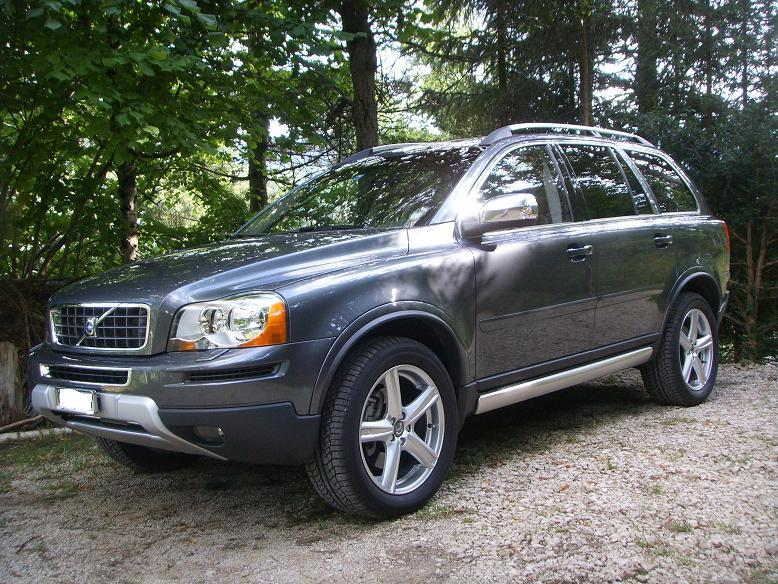

In [ ]:
randomImagePath = '/content/drive/MyDrive/Deep Learning Backup/DataWithAugmentation/car_data/car_data/train/Volvo XC90 SUV 2007/01774.jpg'
randomImg = cv2.imread(randomImagePath)
cv2_imshow(randomImg)

## Change Dataset From 50/50 Train/Test Split To 75/25

In [ ]:
rootPath = '/content/drive/MyDrive/Deep Learning/Keras/car_data/car_data/test'
for folder in os.listdir(rootPath):
  print(len(os.listdir(os.path.join(rootPath, folder))))

44
30
32
43
42
40
39
31
41
33
38
40
42
41
43
36
45
39
42
42
46
40
39
42
43
35
41
42
41
44
34
44
41
41
38
41
42
40
39
44
46
34
36
35
32
43
42
42
35
37
43
44
41
45
30
41
39
37
46
29
35
36
43
38
44
45
42
43
40
44
38
44
37
40
44
48
43
43
45
40
37
45
42
40
43
39
42
41
38
41
45
43
44
40
42
44
39
46
27
33
39
42
39
42
43
37
43
44
45
42
41
42
45
44
45
44
42
44
40
68
41
42
44
43
39
39
38
41
42
24
42
42
42
43
42
19
39
43
41
42
34
32
40
46
42
45
44
44
43
43
44
35
36
42
42
39
36
29
36
44
48
45
43
44
36
41
47
46
44
42
38
44
43
41
38
30
44
41
45
42
38
46
42
40
38
40
43
43
38
42
46
43
45
41
43
40


In [ ]:
#We can see that there are less than 50 examples of each class in our data subsets. 
#This will not be sufficient data for training. 
#Therefore I will move some random images from the test set to the training set
#since a 50/50 split is not great. If this does not work, then I will reduce the
#complexity of the dataset and group the cars based on their Make. This will then
#be the only classification task for the model.

In [ ]:
#NOTE: Once I do this, the csv files will no longer be accurate.

In [ ]:
#First need to rename all training images so there are no duplicates. I will do Img1.jpg-ImgN.jpg for each folder.
train_folder = "/content/drive/MyDrive/Deep Learning/SeparatedByType/car_data/car_data/train"
for folder in os.listdir(train_folder):
  current_path = os.path.join(train_folder, folder)
  for count, filename in enumerate(os.listdir(current_path)):
        dst = f"Img {str(count)}.jpg"
        src =f"{current_path}/{filename}"  
        dst =f"{current_path}/{dst}"
         
#        os.rename(src, dst)

In [ ]:
#Moving images will be done in the Keras folder.
import random
import shutil
seed = 10
rootPath = '/content/drive/MyDrive/Deep Learning/SeparatedByType/car_data/car_data/test'
for folder in os.listdir(rootPath):
  old_path = os.path.join(rootPath, folder)
  new_path = os.path.join('/content/drive/MyDrive/Deep Learning/SeparatedByType/car_data/car_data/train', folder)
  print(old_path)
  print(new_path)
  #We want half our test images to be moved to the training set.
  num_moves = round(len(os.listdir(os.path.join(rootPath, folder)))/2)
  #Pick our random images from each folder.
  for i in range(num_moves):
    random_image = random.Random(i).choice(os.listdir(os.path.join(rootPath, folder)))
    image_path = os.path.join(old_path, random_image)
    print(random_image)
#    shutil.move(image_path, new_path)


## Separated By Make

In [ ]:
#Next I will create the folders combining all vehicles with the same Make.
#First I need to create a new initial dataset.
#!unzip '/content/drive/MyDrive/Deep Learning/CarDetection.zip' -d '/content/drive/MyDrive/Deep Learning/SeparatedByMake'

In [ ]:
#Then I will try separating the data based on type. 7% of the data is not labeled with a type, but there should still be sufficient data to train on other data.

In [ ]:
rootPath = '/content/drive/MyDrive/Deep Learning/SeparatedByMake/car_data/car_data/test'
move_to = '/content/drive/MyDrive/Deep Learning/SeparatedByMake/car_data/car_data/test/test_original'
for folder in os.listdir(rootPath):
  #print(folder)
  current_path = os.path.join(rootPath, folder)
  #shutil.move(current_path, move_to)

In [ ]:
#Make folders for each make.
rootPath = '/content/drive/MyDrive/Deep Learning/SeparatedByMake/car_data/car_data/test'
originalDataPath = '/content/drive/MyDrive/Deep Learning/SeparatedByMake/car_data/car_data/test/test_original'
for folder in os.listdir(originalDataPath):
  print(folder)
  current_path = os.path.join(originalDataPath, folder)
  make, modelTypeYear = folder.split(' ', 1)
  if make=='AM':
    make = 'HUMMER'
  newpath = os.path.join(rootPath, make) 
  print(newpath)
  #if not os.path.exists(newpath):
  #  os.makedirs(newpath)

  
    

  #old_path = os.path.join(rootPath, folder)
  #new_path = os.path.join('/content/drive/MyDrive/Deep Learning/Keras/car_data/car_data/train', folder)
  #print(old_path)
  #print(new_path)
  ##We want half our test images to be moved to the training set.
  #num_moves = round(len(os.listdir(os.path.join(rootPath, folder)))/2)
  ##Pick our random images from each folder.
  #for i in range(num_moves):
  #  random_image = random.Random(i).choice(os.listdir(os.path.join(rootPath, folder)))
  #  image_path = os.path.join(old_path, random_image)
  #  print(random_image)
  #  #shutil.move(image_path, new_path)

In [ ]:
rootPath = '/content/drive/MyDrive/Deep Learning/SeparatedByMake/car_data/car_data/test'
originalDataPath = '/content/drive/MyDrive/Deep Learning/SeparatedByMake/car_data/car_data/test/test_original'
for folder in os.listdir(originalDataPath):
  make, modelTypeYear = folder.split(' ', 1)
  if make=='AM':
    make = 'HUMMER'
  move_to = os.path.join(rootPath, make) 
  for image in os.listdir(os.path.join(originalDataPath, folder)):
      current_path = os.path.join(originalDataPath, folder)
      image_path = os.path.join(current_path, image)
      #shutil.move(image_path, move_to)

## Separated By Type

#### Manually deleted all folders that did not include the type.

### Still need to do for training set.

In [ ]:
rootPath = '/content/drive/MyDrive/Deep Learning/SeparatedByType/car_data/car_data/train'
move_to = '/content/drive/MyDrive/Deep Learning/SeparatedByType/car_data/car_data/train/train_original'
for folder in os.listdir(rootPath):
  #print(folder)
  current_path = os.path.join(rootPath, folder)
#  shutil.move(current_path, move_to)

In [ ]:
#Make folders for each type.
rootPath = '/content/drive/MyDrive/Deep Learning/SeparatedByType/car_data/car_data/train'
originalDataPath = '/content/drive/MyDrive/Deep Learning/SeparatedByType/car_data/car_data/train/train_original'
for folder in os.listdir(originalDataPath):
  print(folder)
  current_path = os.path.join(originalDataPath, folder)
  makeAndMod, Type, year = folder.rsplit(' ', 2)
  newpath = os.path.join(rootPath, Type) 
  print(Type)
  #print(newpath)
  if not os.path.exists(newpath):
#    os.makedirs(newpath)

AM General Hummer SUV 2000
SUV
Acura RL Sedan 2012
Sedan
Acura TL Sedan 2012
Sedan
Acura TSX Sedan 2012
Sedan
Acura ZDX Hatchback 2012
Hatchback
Aston Martin V8 Vantage Convertible 2012
Convertible
Aston Martin V8 Vantage Coupe 2012
Coupe
Aston Martin Virage Convertible 2012
Convertible
Aston Martin Virage Coupe 2012
Coupe
Audi 100 Sedan 1994
Sedan
Audi 100 Wagon 1994
Wagon
Audi A5 Coupe 2012
Coupe
Audi R8 Coupe 2012
Coupe
Audi RS 4 Convertible 2008
Convertible
Audi S4 Sedan 2007
Sedan
Audi S4 Sedan 2012
Sedan
Audi S5 Convertible 2012
Convertible
Audi S5 Coupe 2012
Coupe
Audi S6 Sedan 2011
Sedan
Audi TT Hatchback 2011
Hatchback
Audi TT RS Coupe 2012
Coupe
Audi TTS Coupe 2012
Coupe
Audi V8 Sedan 1994
Sedan
BMW 1 Series Convertible 2012
Convertible
BMW 1 Series Coupe 2012
Coupe
BMW 3 Series Sedan 2012
Sedan
BMW 3 Series Wagon 2012
Wagon
BMW 6 Series Convertible 2007
Convertible
BMW ActiveHybrid 5 Sedan 2012
Sedan
BMW M3 Coupe 2012
Coupe
BMW M5 Sedan 2010
Sedan
BMW M6 Convertible 2010
Con

In [ ]:
rootPath = '/content/drive/MyDrive/Deep Learning/SeparatedByType/car_data/car_data/train'
originalDataPath = '/content/drive/MyDrive/Deep Learning/SeparatedByType/car_data/car_data/train/train_original'
count = 0
for folder in os.listdir(originalDataPath):
  for image in os.listdir(os.path.join(originalDataPath, folder)):
    current_path = os.path.join(originalDataPath, folder)
    dst = f"Img {str(count)}.jpg"
    src =f"{current_path}/{image}"  
    dst =f"{current_path}/{dst}"
#    os.rename(src, dst)
    count =  count+1

for folder in os.listdir(originalDataPath):
  makeAndMod, Type, year = folder.rsplit(' ', 2)
  move_to = os.path.join(rootPath, Type) 
  for image in os.listdir(os.path.join(originalDataPath, folder)):
    current_path = os.path.join(originalDataPath, folder)
    new_image_path = os.path.join(current_path, image)
#    shutil.move(new_image_path, move_to)

## Data Augmentation

In [ ]:
import os
dataAug = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, horizontal_flip=True)  
trainFolder = '/content/drive/MyDrive/Deep Learning/DataWithAugmentation/car_data/car_data/train'
for folder in os.listdir(trainFolder):
  save_in = os.path.join(trainFolder, folder)
  for image in os.listdir(os.path.join(trainFolder, folder)):
    currentImg = os.path.join(save_in, image)
    readImg = cv2.imread(currentImg)
    im2aug = np.expand_dims(readImg,0)
    aug_iter = dataAug.flow(im2aug, save_to_dir=save_in, save_prefix='aug', save_format='jpg')
    #aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(3)]

#### Note that since we only want our training set to have augmented images, we will need to make a separate validation folder with original images instead of splitting from the training set when we call tf.keras.preprocessing.image_dataset_from_directory. This could be done using the same split method as before, taking images from the test set, only saving the images in a new folder called validation instead of adding them to training.

In [ ]:
#Check for corrupted images:
rootPath = '/content/drive/MyDrive/Deep Learning/DataWithAugmentation/car_data/car_data/train'
for folder in os.listdir(rootPath):
  currentFolderPath = os.path.join(rootPath, folder)
  for image in os.listdir(os.path.join(rootPath, folder)):
      image_path = os.path.join(currentFolderPath, image)
      size = os.stat(image_path).st_size
      if size == 0:
        print(folder)
        print(image)
        #delete
#        os.remove(image_path)

AM General Hummer SUV 2000
aug_0_4664.jpg
AM General Hummer SUV 2000
aug_0_2347.jpg
AM General Hummer SUV 2000
aug_0_8655.jpg
AM General Hummer SUV 2000
aug_0_5152.jpg
AM General Hummer SUV 2000
aug_0_2262.jpg
AM General Hummer SUV 2000
aug_0_3158.jpg
AM General Hummer SUV 2000
aug_0_2590.jpg
AM General Hummer SUV 2000
aug_0_4830.jpg
AM General Hummer SUV 2000
aug_0_9995.jpg
AM General Hummer SUV 2000
aug_0_4556.jpg
AM General Hummer SUV 2000
aug_0_2431.jpg
AM General Hummer SUV 2000
aug_0_3365.jpg
AM General Hummer SUV 2000
aug_0_9259.jpg
Chevrolet Impala Sedan 2007
aug_0_245.jpg
Chevrolet Impala Sedan 2007
aug_0_3793.jpg
Chevrolet Impala Sedan 2007
aug_0_4246.jpg
Chevrolet Impala Sedan 2007
aug_0_2102.jpg
Chevrolet Impala Sedan 2007
aug_0_4601.jpg
Chevrolet Impala Sedan 2007
aug_0_9719.jpg
Chevrolet Impala Sedan 2007
aug_0_4920.jpg
Chevrolet Impala Sedan 2007
aug_0_5890.jpg
Chevrolet Impala Sedan 2007
aug_0_2496.jpg
Chevrolet Impala Sedan 2007
aug_0_6971.jpg
Chevrolet Impala Sedan 20

## Make A Validation Folder

#### The purpose of making a validation folder, rather than splitting the training set into training/validation is to avoid the validation data set from containing augmented versions of images within the training set. This would cause false accuracies, in that the validation would be using the same images that have been used to train that have been slightly altered, but are still the same image. Therefore, I will generate a separate validation folder by taking half of the test images. This will then leave more training instances and will use more data for validation since the test set is so large. 

In [ ]:
#Make new folder.
# os.makedirs('/content/drive/MyDrive/Deep Learning/DataWithAugmentation/car_data/car_data/validation')

In [ ]:
#Now moves images from test set into that folder.
seed = 10
rootPath = '/content/drive/MyDrive/Deep Learning/DataWithAugmentation/car_data/car_data/test'
for folder in os.listdir(rootPath):
  old_path = os.path.join(rootPath, folder)
  new_path = os.path.join('/content/drive/MyDrive/Deep Learning/DataWithAugmentation/car_data/car_data/validation', folder)
#  os.makedirs(new_path)
  print(old_path)
  print(new_path)
  #We want half our test images to be moved to the training set.
  num_moves = round(len(os.listdir(os.path.join(rootPath, folder)))/2)
  #Pick our random images from each folder.
  for i in range(num_moves):
    random_image = random.Random(i).choice(os.listdir(os.path.join(rootPath, folder)))
    image_path = os.path.join(old_path, random_image)
    print(random_image)
#    shutil.move(image_path, new_path)